<a href="https://colab.research.google.com/github/shahpriyanka26/shahpriyanka26/blob/main/Copy_of_Alzheimer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clasification Mild_Demenetd and Non_Demeneted

Steps:
1. Import pre-trained VGG16 model
2. Extract VGG16 feature from the images (MRI with above mentioned classes)
3. Train a Random Foreset classifier suing the extracted feature

Reasons: 
Its faster then training a custom CNN model
RF is fast to train


In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

In [ ]:
import numpy as np
import os
import glob
import cv2
from sklearn.utils import shuffle 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils

from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
data_path ='/content/drive/MyDrive/IQVIA/Alzimer_Dataset/'

data_dir_list = os.listdir(data_path)
SIZE = 120  #Resize images

images = []
labels = [] 

for directory_path in glob.glob(data_path + "*"):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
        labels.append(label)

#Convert lists to arrays        
images = np.array(images)
labels = np.array(labels)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/contrast_mild_49.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/scale_mild_49.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/nosie_mild_490.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/contrast_mild_490.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/scale_mild_490.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/nosie_mild_487.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/contrast_mild_487.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/scale_mild_487.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/nosie_mild_486.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/contrast_mild_486.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/scale_mild_486.jpg
/content/drive/MyDrive/IQVIA/Alzimer_Dataset/Mild_Demented/nosie_mild_484.jpg
/co

In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(labels)
labels_encoded = le.transform(labels)

In [ ]:
#split the images for training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.3, random_state=42)

#Get the test lables into original text format for future use
test_labels = le.inverse_transform(y_test)
print(len(X_test))
print(len(test_labels))

# Normalize pixel values to between 0 and 1
x_train, x_test = X_train / 255.0, X_test / 255.0

#One hot encode y values for neural network. 
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

2036
2036


In [ ]:
#loading vgg16 without classification layers - Transfer learning 
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in VGG_model.layers:
	layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
#extract features using vgg16
feature_extractor=VGG_model.predict(X_train)

#Reshape the features
X_features = feature_extractor.reshape(feature_extractor.shape[0], -1)

In [ ]:
#Training a Random forest classificer using the features

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 200, random_state = 12)

# Train the model on training data
RF_model.fit(X_features, y_train)

RandomForestClassifier(n_estimators=200, random_state=12)

Accuracy =  0.9469548133595285
[[986  95]
 [ 13 942]]
               precision    recall  f1-score   support

Mild_Demented       0.99      0.91      0.95      1081
 Non_Demented       0.91      0.99      0.95       955

     accuracy                           0.95      2036
    macro avg       0.95      0.95      0.95      2036
 weighted avg       0.95      0.95      0.95      2036



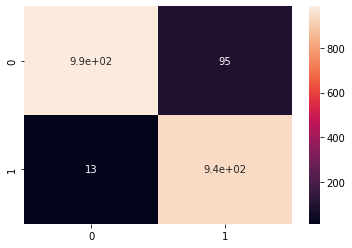

In [ ]:
#Extrating features for test data
X_test_features = VGG_model.predict(X_test)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

#Predict using the trained RF model. 
pred_RF = RF_model.predict(X_test_features)

#Getting back original label back. 
pred_RF = le.inverse_transform(pred_RF)

#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, pred_RF))

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(test_labels, pred_RF)
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

print(classification_report(test_labels, pred_RF,target_names=['Mild_Demented', 'Non_Demented']))